# 2nd Individual Assignment in Image and Video Technology and Analysis


### **Student Name: Nikolaos Katsaidonis**

### **Student ID: 03121868**


# Part A: Theoretical Section  
In this section, we study the three papers and present summary tables with the key characteristics of the networks.


# Paper 1: Handwritten Digit Recognition with a Back-Propagation Network (LeNet)

This paper presents the design of a network that closely resembles modern CNNs, specifically the LeNet architecture, aimed at handwritten digit classification. The network focuses on reducing the number of parameters and consists of 4 layers: H1, H2, H3, H4. Average pooling is applied between convolutions. Below is a summary of the architecture in table format:

! For an input map of size N×N, the output is (N–m+1)×(N–m+1), where m = kernel size.

## Overall Network Architecture

| Layer     | Feature Maps | Map Size (Output) | Units (Neurons) | Description |
|-----------|----------------|---------------------|------------------|-------------|
| Input     | 1              | 28×28               | 784              | Extended from 16×16 original image |
| H1        | 4              | 24×24               | 4×576 = 2304     | Convolution with 5×5 kernels, stride 1 |
| H2        | 4              | 12×12               | 4×144 = 576      | 2×2 average pooling, stride = 2 (subsampling) |
| H3        | 12             | 8×8                 | 12×64 = 768      | Convolution with 5×5 kernels, input from H2 |
| H4        | 12             | 4×4                 | 12×16 = 192      | Subsampling 2×2, same as H2 |
| Output    | -              | 10                  | 10               | Fully connected layer for digit classification |

**Activation: Not explicitly mentioned, but likely tanh to output values in the range [-1, 1].**

**No activation follows the pooling layers, as pooling itself performs a form of smoothing.**

**Total units (neurons):** 4635

**Total connections (weights):** 98,442

**Independent parameters (weights + biases):** 2578


# Paper 2: ImageNet Classification with Deep Convolutional Neural Networks (AlexNet)

This paper presents the architecture of the well-known AlexNet. It is a deep neural network with **5 convolutional layers, 3 fully connected layers**, and several **intermediate regularization and max pooling layers**. The paper emphasizes the importance of **using ReLU activation**, both to address the vanishing gradients problem and to reduce training time. 

Furthermore, it is shown experimentally that **overlapping pooling (i.e., kernel size > stride)** improves the generalization ability of the model. Lastly, the application of **dropout helps prevent overfitting**. The architecture of the network is presented in the table below:

| **Layer**          | **Type**                  | **Number of Kernels (maps)** | **Kernel Size** | **Stride** | **Output Size**       | **Notes**                                                |
|--------------------|---------------------------|-------------------------------|-----------------|------------|------------------------|----------------------------------------------------------|
| **Input Layer**    | Image Input               | -                             | 224x224x3       | -          | 224x224x3              | Resized to 224x224 and normalized.                       |
| **Conv1**          | Convolutional             | 96                            | 11x11x3         | 4          | 55x55x96               | Response normalization applied.                          |
| **Max Pooling1**   | Pooling                   | -                             | 3x3             | 2          | 27x27x96               | Max pooling with stride 2.                               |
| **Conv2**          | Convolutional             | 256                           | 5x5x48          | 1          | 27x27x256              | Response normalization applied.                          |
| **Max Pooling2**   | Pooling                   | -                             | 3x3             | 2          | 13x13x256              | Max pooling with stride 2.                               |
| **Conv3**          | Convolutional             | 384                           | 3x3x256         | 1          | 13x13x384              | Response normalization applied.                          |
| **Conv4**          | Convolutional             | 384                           | 3x3x192         | 1          | 13x13x384              | -                                                        |
| **Conv5**          | Convolutional             | 256                           | 3x3x192         | 1          | 13x13x256              | -                                                        |
| **FC1**            | Fully Connected (Dense)   | -                             | -               | -          | 4096                   | -                                                        |
| **FC2**            | Fully Connected (Dense)   | -                             | -               | -          | 4096                   | -                                                        |
| **FC3**            | Fully Connected (Dense)   | -                             | -               | -          | 1000                   | Output layer with 1000 classes (for classification).     |
| **Output Layer**   | Softmax (for classification) | -                          | -               | -          | 1000                   | Final output (probabilities for 1000 classes).           |

We note that the general formula for output size is:  
**[(N + 2P – F) / s + 1]**, where:

- **N**: Input dimension (NxN)  
- **F**: Kernel (filter) size  
- **P**: Padding (used to preserve spatial dimensions)  
- **s**: Stride

**Total neurons:** 650K  
**Total connections (weights):** 60M




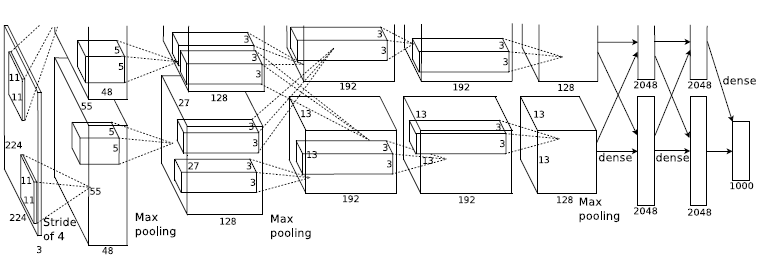

### Techniques for Better Generalization

### Data Augmentation

To reduce overfitting, two main forms of data augmentation are used:

1. **Random Crops & Reflections**:
   - Random 224×224 patches (and their horizontal reflections) are extracted from the original 256×256 images.
   - This significantly increases the size of the training set without needing to store additional images.

2. **Brightness & Color Variations (PCA-based Augmentation)**:
   - PCA is performed on the RGB pixel values and random variations are added along the principal components.
   - This simulates changes in lighting and color conditions in the environment.

These techniques contribute to **improving the network's generalization** and reduce the top-1 error rate by **more than 1%**.

---

### Dropout

- Applied to the first two fully connected layers.
- During training, each neuron is "turned off" with a probability of 0.5.
- The network learns **more general and robust features**, since it cannot rely on specific neurons.
- During testing, all neurons are active, but their outputs are scaled by 0.5 to simulate the training behavior.
- Dropout is highly effective for **preventing overfitting**, although it slows convergence (roughly doubles the number of iterations).

---


### Experimental Results

The following tables summarize the performance of the CNN model compared to other methods across various ImageNet datasets, as reported in the paper.

### Table 1: ILSVRC-2010

| Model              | Top-1  | Top-5  |
|--------------------|--------|--------|
| Sparse coding      | 47.1%  | 28.2%  |
| SIFT + FVs         | 45.7%  | 25.7%  |
| **CNN (AlexNet)**  | **37.5%**  | **17.0%**  |

The CNN clearly outperforms traditional feature representation methods (e.g., SIFT, FVs).

---

### Table 2: ILSVRC-2012

| Model                  | Top-1 (val) | Top-5 (val) | Top-5 (test) |
|------------------------|-------------|-------------|--------------|
| SIFT + FVs             | —           | —           | 26.2%        |
| 1 CNN                  | 40.7%       | 18.2%       | —            |
| 5 CNNs                 | 38.1%       | 16.4%       | **16.4%**    |
| 1 CNN* (fine-tuned)    | 39.0%       | 16.6%       | —            |
| 7 CNNs* (ensemble)     | **36.7%**   | **15.4%**   | **15.3%**    |

> The symbol `*` refers to models pre-trained on a larger dataset (Fall 2011, 22K classes) and then fine-tuned on ILSVRC-2012.

**Conclusions**:
- The CNN (AlexNet) significantly outperforms classical approaches.
- Combining multiple CNNs (ensemble) further reduces the error rate.
- Fine-tuning on a large dataset leads to improved accuracy.

---

*The tables report Top-1 and Top-5 error rates: the percentage of cases where the correct label was not the top prediction (Top-1), or not among the top five predictions (Top-5).*


# Paper 3: VERY DEEP CONVOLUTIONAL NETWORKS FOR LARGE-SCALE IMAGE RECOGNITION (VGG)

This paper introduced a simple yet highly effective CNN architectural pattern, known as **VGGNet**, which achieved state-of-the-art performance in the ILSVRC 2014 competition. Its key contribution was the use of **very deep networks** (up to 19 weight layers) that rely entirely on **small 3×3 filters** across the entire architecture. This design allowed for better feature representation without a significant increase in the number of parameters.

The paper presents several variants, so we will provide a general overview of the architecture, rather than a detailed layer-by-layer breakdown like in the previous models.

| Component             | Description                                                                  |
|-----------------------|------------------------------------------------------------------------------|
| Input                 | RGB image of size 224×224                                                    |
| Conv Layers           | Small 3×3 filters, stride 1, padding 1                                       |
| 1×1 Conv              | (used in some variants, e.g., configuration C)                               |
| Max-Pooling           | 2×2 window with stride 2                                                     |
| Fully Connected Layers| 2 × 4096 neurons + 1 × 1000 (final softmax for ILSVRC classification)        |
| Activation Function   | ReLU used in all hidden layers                                               |
| Network Depth         | 11 to 19 weight layers (8–16 conv + 3 FC)                                    |
| No LRN                | Not used, as it showed no improvement on ImageNet performance                |

---

### Methods for Improving Generalization

To avoid overfitting and improve generalization, the authors used:

- **Data Augmentation**: Random crops, horizontal flips, and RGB jittering applied to the training set.
- **Dropout**: Applied to the fully connected (FC) layers with a dropout probability of 0.5.
- **Weight Decay (L2 Regularization)**: Added as a penalty term in the loss function to discourage overfitting.

VGG’s main innovation was using many small kernels, resulting in deeper networks. Additionally, it starts with 64 feature maps and **doubles them after each pooling layer**.

These techniques, combined with a deep yet orderly architecture, led VGGNet to achieve excellent classification accuracy.

## VGGNet Performance (ILSVRC 2014)

- **Top-1 error (single model):** ~24.4%  
- **Top-5 error (single model):** **7.3%**  
- **Top-5 error (ensemble):** ~6.8%


# Comparative Overview: LeNet, AlexNet & VGGNet

| Characteristic             | LeNet (1998)              | AlexNet (2012)                 | VGGNet (2014)                  |
|---------------------------|---------------------------|--------------------------------|-------------------------------|
| Depth                     | ~7 layers                 | 8 (5 Conv + 3 FC)              | 11–19 (16 Conv + 3 FC)        |
| Conv Filters              | 5×5                       | 11×11, 5×5, 3×3                | 3×3 (throughout the network)  |
| Stride                    | 1                         | 4 (initial), 1 in later layers | 1                             |
| Padding                   | No                        | Yes (to preserve dimensions)   | Yes (usually 1 pixel)         |
| Activation Function       | tanh/sigmoid              | ReLU                           | ReLU                          |
| Parameters                | ~98K                      | ~60M                           | ~133M                         |
| Pooling                   | Average Pooling           | Max Pooling (3×3, stride 2)    | Max Pooling (2×2, stride 2)   |
| Dropout                   | No                        | Yes (in FC layers)             | Yes (in FC layers)            |
| Data Augmentation         | No                        | Yes (cropping, flip, PCA)      | Yes (cropping, flip)          |
| Accuracy                  | 3.4% (error rate)         | 17.0% (Top-5 error)            | **7.3%** (Top-5 error)        |

**Note: LeNet's low error rate is due to the much simpler problem (10 classes, e.g., MNIST).**

---

## Remarks

- **LeNet-5** was revolutionary at its time, but designed for simple grayscale images. It uses tanh/sigmoid activations and very few parameters, without dropout or data augmentation.
- **AlexNet** introduced ReLU, dropout, data augmentation, and leveraged GPU training.
- **VGGNet** focused on **increasing depth** using small filters (3×3) across the architecture.

The performance improves significantly from LeNet → AlexNet → VGGNet, mainly due to better architectural design, more data, and stronger regularization techniques.


# Part Β: Implementation

### Introduction and Overview of the Dataset


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals # legacy compatibility

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# helper functions

# select from from_list elements with index in index_list
def select_from_list(from_list, index_list):
  filtered_list= [from_list[i] for i in index_list]
  return(filtered_list)

# append in filtered_list the index of each element of unfilterd_list if it exists in in target_list
def get_ds_index(unfiliterd_list, target_list):
  index = 0
  filtered_list=[]
  for i_ in unfiliterd_list:
    if i_[0] in target_list:
      filtered_list.append(index)
    index += 1
  return(filtered_list)
#usefull if we want to keep specific labels
"""
ΕXAMPLE:

unfiltered_list = [(1, 'image1'), (2, 'image2'), (3, 'image3'), (1, 'image4')]
target_list = [1, 3]

get_ds_index(unfiltered_list, target_list)
# --> [0, 2, 3]

"""


"\nΕXAMPLE:\n\nunfiltered_list = [(1, 'image1'), (2, 'image2'), (3, 'image3'), (1, 'image4')]\ntarget_list = [1, 3]\n\nget_ds_index(unfiltered_list, target_list)\n# --> [0, 2, 3]\n\n"

### Exploring the dataset

In [ ]:
# load the entire dataset
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(x_train_all, y_train_all), (x_test_all, y_test_all) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
print(x_train_all.shape) #RGB 32x32

(50000, 32, 32, 3)


Each team will work with a different subset of the dataset.  
In the next cell, replace the value of the `team_seed` variable with the number corresponding to your team.


In [ ]:
# REPLACE WITH YOUR TEAM NUMBER
team_seed = 868
"""
# select from CIFAR100 20 classes
cifar100_classes_url = "https://pastebin.com/raw/nzE1n98V"#its a .csv which contains
                                                          #20 labels in each line
"""


'\n# select from CIFAR100 20 classes\ncifar100_classes_url = "https://pastebin.com/raw/nzE1n98V"#its a .csv which contains\n                                                          #20 labels in each line\n'

In [ ]:
import requests
import pandas as pd
from io import StringIO

# Download team_classes
response1 = requests.get("https://pastebin.com/raw/nzE1n98V")
data = StringIO(response1.text)
team_classes = pd.read_csv(data, sep=",", header=None)

# Download label names
response2 = requests.get("https://pastebin.com/raw/qgDaNggt")
data_labels = StringIO(response2.text)
CIFAR100_LABELS_LIST = pd.read_csv(data_labels, sep=",", header=None).astype(str).values.tolist()[0]


In [ ]:
"""
με team seed = 868 παιρνουμε out of bounds error
αφου εχουμε μονο 200 γραμμές

"""
print(team_classes.shape)
team_seed = 144

(200, 20)


Δημιουργούμε το μοναδικό dataset της ομάδας μας:

In [ ]:
#team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
#CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0] #all the categories in strings



our_index = team_classes.iloc[team_seed,:].values.tolist() #get the line 868 -> 20 classes idxs
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index) #get the name of our clases
train_index = get_ds_index(y_train_all, our_index) #get the idxs samples that belongs tou our classes
test_index = get_ds_index(y_test_all, our_index)

x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
y_test_ds = np.asarray(select_from_list(y_test_all, test_index))

In [ ]:
# print our classes
print(f"The classes that we have are {len(our_classes)}:")
print(our_classes)

The classes that we have are 20:
[' bee', ' boy', ' bridge', ' bus', ' can', ' cattle', ' clock', ' dolphin', ' flatfish', ' lion', ' motorcycle', ' orchid', ' possum', ' seal', ' shrew', ' snake', ' spider', ' sweet_pepper', ' television', ' wolf']


In [ ]:
print("Images of shape:")
print(x_train_ds[1].shape)

Images of shape:
(32, 32, 3)


Train: X=(8500, 32, 32, 3), y=(8500, 1)
Validation: X=(1500, 32, 32, 3), y=(1500, 1)
Test: X=(2000, 32, 32, 3), y=(2000, 1)


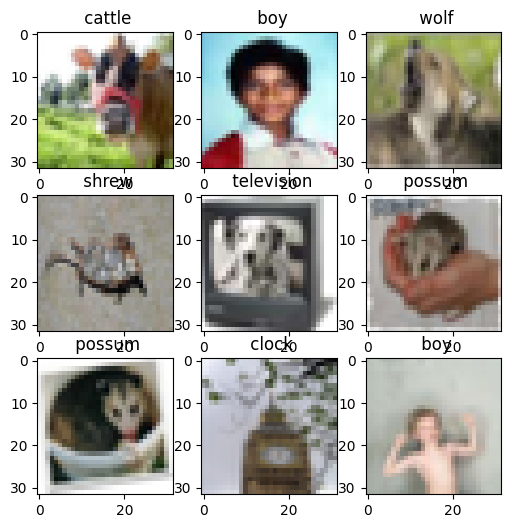

In [ ]:
# get (train) dataset dimensions
data_size, img_rows, img_cols, img_channels = x_train_ds.shape

# set validation set percentage (wrt the training set size)
validation_percentage = 0.15
val_size = round(validation_percentage * data_size)


# Reserve val_size samples for validation and normalize all values
x_val = x_train_ds[-val_size:] #takes the last val_size elements, regulization to [0-1]
y_val = y_train_ds[-val_size:]
x_train = x_train_ds[:-val_size] #the rest for training
y_train = y_train_ds[:-val_size]
x_test = x_test_ds
y_test = y_test_ds

#Firstly convert to float because the images may be unit8
x_train = (x_train.astype('float32') / 255.0)
x_val   = (x_val.astype('float32')   / 255.0)
x_test  = (x_test.astype('float32')  / 255.0)

y_train = np.array(y_train, dtype=np.int32)
y_val = np.array(y_val, dtype=np.int32)
y_test = np.array(y_test, dtype=np.int32)


# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# get class label from class index (returns the name of the class)
def class_label_from_index(fine_category):
  return(CIFAR100_LABELS_LIST[fine_category.item(0)])

# plot first few images
plt.figure(figsize=(6, 6))
for i in range(9):
	# define subplot
  plt.subplot(330 + 1 + i).set_title(class_label_from_index(y_train[i]))
	# plot raw pixel data
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  #show the figure
plt.show()

In [ ]:
#Entropy waits classes with indexes from 0 to 19 so we map the indexes to 0-19
mapping = {}
for new_label,original_label in enumerate(our_index):
  mapping[original_label] = new_label

print(mapping)

{6: 0, 11: 1, 12: 2, 13: 3, 16: 4, 19: 5, 22: 6, 30: 7, 32: 8, 43: 9, 48: 10, 54: 11, 64: 12, 72: 13, 74: 14, 78: 15, 79: 16, 83: 17, 87: 18, 97: 19}


In [ ]:
#lets print the distinct values of y before mapping
print(np.unique(y_train))



[ 6 11 12 13 16 19 22 30 32 43 48 54 64 72 74 78 79 83 87 97]


In [ ]:
#mapping the y_train set
y_train = np.array([mapping[label[0]] for label in y_train])
print(np.unique(y_train))


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [ ]:
#mapping y_val and y_test
y_val = np.array([mapping[label[0]] for label in y_val])
print(np.unique(y_val))

y_test = np.array([mapping[label[0]] for label in y_test])
print(np.unique(y_test))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


## Question 1
---
### Step 1: Design and Training of the Models

Design and train the **LeNet, AlexNet, and VGG** models, as well as your own custom model (e.g., name it **MyCNN**), using the same optimization algorithm ([optimizer](https://keras.io/api/optimizers/)), the same [loss function](https://keras.io/api/losses/), the same batch size, and 50 training epochs `*`.

To evaluate the performance of the models, use the F1-score as the evaluation [metric](https://keras.io/api/metrics/).

`*`  
You may experiment with different optimizers, loss functions, and batch sizes for the four models before settling on a final common configuration for all of them.

---

### Step 2: Model Evaluation

a. For each of the models trained in Step 1, plot both the training and validation F1-scores on the same graph across all epochs.

b. Thoroughly evaluate your results in terms of:
 - The impact of the number of data points/classes.
 - The effect of the optimization algorithm (optimizer).
 - The influence of the batch size.

---

### Step 3: F1-score Evaluation  
Evaluate the F1-scores using your test set.

---


In [ ]:
from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import Callback
import numpy as np

**Class for getting f1 score while train/validation**

In [ ]:
"""
We can not automatically compute f1 while training.
So we will create a callback class which will
allow us to "interupt" training to compute the f1
after every epoch.

"""


class F1ScoreCallback(Callback):
    def __init__(self, x_train, y_train, x_val, y_val):
        super().__init__()
        self.x_train = x_train
        self.y_train = y_train
        self.x_val = x_val
        self.y_val = y_val
        self.f1_train_scores = []
        self.f1_val_scores = []



    #this is executed after each epoch (custom method of Callback class)
    def on_epoch_end(self, epoch, logs=None):

        # Predictions on train and val
        logits_train = self.model.predict(self.x_train, verbose=0)
        logits_val = self.model.predict(self.x_val, verbose=0)

        # Apply softmax to get probabilities
        y_train_pred = np.argmax(tf.nn.softmax(logits_train), axis=1)
        y_val_pred = np.argmax(tf.nn.softmax(logits_val), axis=1)


        y_train_true = self.y_train #.flatten()
        y_val_true = self.y_val #.flatten()


        #f1 scores
        f1_train = f1_score(y_train_true, y_train_pred, average='macro')
        f1_val = f1_score(y_val_true, y_val_pred, average='macro')

        #append to the ist for plots
        self.f1_train_scores.append(f1_train)
        self.f1_val_scores.append(f1_val)


        print(f" — f1_train: {f1_train:.4f} — f1_val: {f1_val:.4f}")


# LeNet  
We begin with the LeNet network, which is a relatively "lightweight" model with few parameters.  
Below is the implementation class for LeNet, followed by the training process, where we print the F1-score and accuracy for both the training and validation sets in each epoch:


In [ ]:
#Our network

class LeNet(tf.keras.Model):

    def __init__(self, num_classes=20):
        super().__init__()
        #self.save_hyperparameters()
        self.model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(filters=4, kernel_size=5,
                                   activation='sigmoid', padding='same',  input_shape=(32, 32, 3)),
            tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
            tf.keras.layers.Conv2D(filters=12, kernel_size=5,
                                   activation='sigmoid'),
            tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(120, activation='sigmoid'), #output = 12(maps)x4x4=192
            tf.keras.layers.Dense(84, activation='sigmoid'),
            tf.keras.layers.Dense(num_classes)
            ])

    def call(self, x):
      return self.model(x)

In [ ]:
#model
model = LeNet(num_classes=20)

#callback
f1_callback = F1ScoreCallback(x_train, y_train, x_val, y_val)


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[f1_callback]
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.0500 - loss: 3.0365 — f1_train: 0.0048 — f1_val: 0.0044
133/133 ━━━━━━━━━━━━━━━━━━━━ 16s 99ms/step - accuracy: 0.0500 - loss: 3.0363 - val_accuracy: 0.0460 - val_loss: 2.9990
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.0622 - loss: 2.9840 — f1_train: 0.0552 — f1_val: 0.0481
133/133 ━━━━━━━━━━━━━━━━━━━━ 21s 105ms/step - accuracy: 0.0624 - loss: 2.9836 - val_accuracy: 0.1067 - val_loss: 2.8340
Epoch 3/50
132/133 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.1283 - loss: 2.7836 — f1_train: 0.0951 — f1_val: 0.0955
133/133 ━━━━━━━━━━━━━━━━━━━━ 14s 102ms/step - accuracy: 0.1283 - loss: 2.7834 - val_accuracy: 0.1540 - val_loss: 2.7502
Epoch 4/50
132/133 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.1571 - loss: 2.7168 — f1_train: 0.1034 — f1_val: 0.0982
133/133 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - accuracy: 0.1571 - loss: 2.7168 - val_accuracy: 0.1500 - val_loss: 2.7292
Epoch 5/50
133/133 ━━━━━━━━━━

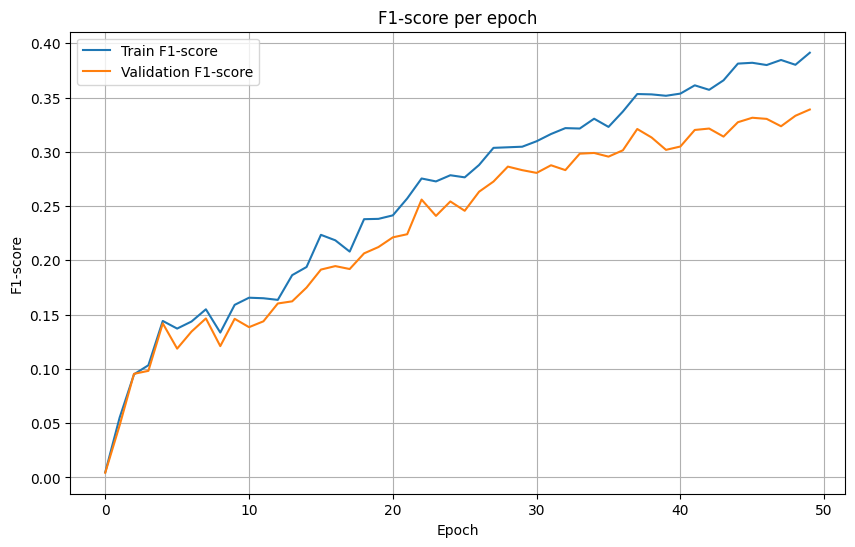

In [ ]:
#plot of f1 scores
plt.figure(figsize=(10, 6))
plt.plot(f1_callback.f1_train_scores, label='Train F1-score')
plt.plot(f1_callback.f1_val_scores, label='Validation F1-score')
plt.title('F1-score per epoch')
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.legend()
plt.grid(True)
plt.show()


We observe that throughout the epochs, the F1-score steadily increases, although it does not reach particularly high values.


**Testing the model**

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
################ TESTING ###############

#logits and predictions on test set
y_pred_logits = model.predict(x_test)
y_pred = np.argmax(y_pred_logits, axis=1)

# F1 and accuracy
y_test = y_test.flatten()
f1_macro = f1_score(y_test, y_pred, average='macro')
acc = accuracy_score(y_test, y_pred)

print("F1 Score:", f1_macro)
print("Accuracy:", acc)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
F1 Score: 0.34458229118247974
Accuracy: 0.356


Above, we can see the overall F1-score and accuracy on the entire test set.  
The performance is notably low, which can be attributed both to the simple architecture of the network (as it is one of the earliest CNN models) and to the relatively small size of our training dataset compared to the original.  
The official dataset used for training included 6,000 samples per category, whereas ours contains only 8,500 samples in total.


# AlexNet  
We continue with AlexNet, which is a significantly deeper and larger network.


In [ ]:
#Resize the images to 224x224
x_train = tf.image.resize(x_train, [224, 224])
x_val = tf.image.resize(x_val, [224, 224])
x_test = tf.image.resize(x_test, [224, 224])


In [ ]:
import tensorflow as tf

"""
Papers refers Local Response Normalization
but nowadays we use BatchNorm.

"""



class AlexNet(tf.keras.Model):
    def __init__(self, num_classes=20):
        super(AlexNet, self).__init__()

        self.model = tf.keras.Sequential([
            # Conv1
            tf.keras.layers.Conv2D(96, kernel_size=11, strides=4, activation='relu', input_shape=(224, 224, 3)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPooling2D(pool_size=3, strides=2),

            # Conv2
            tf.keras.layers.Conv2D(256, kernel_size=5, padding='same', activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPooling2D(pool_size=3, strides=2),

            # Conv3
            tf.keras.layers.Conv2D(384, kernel_size=3, padding='same', activation='relu'),

            # Conv4
            tf.keras.layers.Conv2D(384, kernel_size=3, padding='same', activation='relu'),

            # Conv5
            tf.keras.layers.Conv2D(256, kernel_size=3, padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D(pool_size=3, strides=2),

            tf.keras.layers.Flatten(),

            # FC1
            tf.keras.layers.Dense(4096, activation='relu'),
            tf.keras.layers.Dropout(0.5),

            # FC2
            tf.keras.layers.Dense(4096, activation='relu'),
            tf.keras.layers.Dropout(0.5),

            # Output Layer
            tf.keras.layers.Dense(num_classes)
        ])

    def call(self, inputs):
        return self.model(inputs)


In [ ]:
#model
model = AlexNet(num_classes=20)

#callback
f1_callback = F1ScoreCallback(x_train, y_train, x_val, y_val)


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[f1_callback]
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.0578 - loss: 3.2526 — f1_train: 0.0748 — f1_val: 0.0697
133/133 ━━━━━━━━━━━━━━━━━━━━ 53s 322ms/step - accuracy: 0.0580 - loss: 3.2507 - val_accuracy: 0.1093 - val_loss: 2.8537
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.1568 - loss: 2.7422 — f1_train: 0.1519 — f1_val: 0.1297
133/133 ━━━━━━━━━━━━━━━━━━━━ 54s 167ms/step - accuracy: 0.1569 - loss: 2.7419 - val_accuracy: 0.1673 - val_loss: 2.6638
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.1901 - loss: 2.5934 — f1_train: 0.1830 — f1_val: 0.1721
133/133 ━━━━━━━━━━━━━━━━━━━━ 36s 127ms/step - accuracy: 0.1901 - loss: 2.5934 - val_accuracy: 0.2073 - val_loss: 2.5905
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.2144 - loss: 2.5564 — f1_train: 0.2280 — f1_val: 0.1916
133/133 ━━━━━━━━━━━━━━━━━━━━ 26s 168ms/step - accuracy: 0.2145 - loss: 2.5561 - val_accuracy: 0.2213 - val_loss: 2.5668
Epoch 5/50
133/133 ━━━━━━━━

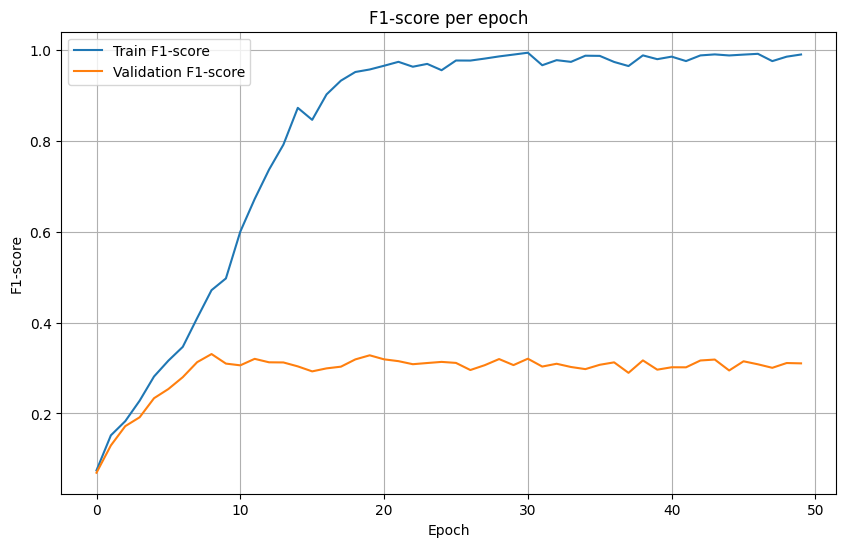

In [ ]:
#plot of f1 scores
plt.figure(figsize=(10, 6))
plt.plot(f1_callback.f1_train_scores, label='Train F1-score')
plt.plot(f1_callback.f1_val_scores, label='Validation F1-score')
plt.title('F1-score per epoch')
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.legend()
plt.grid(True)
plt.show()


We observe that the training F1-score approaches 1, which indicates that the model is memorizing the data and overfitting.  
This is expected, as the network has a large number of parameters and requires a larger dataset to reduce its capacity and prevent it from memorizing too easily.


**Testing the model**

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
################ TESTING ###############

#logits and predictions on test set
y_pred_logits = model.predict(x_test)
y_pred = np.argmax(y_pred_logits, axis=1)

# F1 and accuracy
y_test = y_test.flatten()
f1_macro = f1_score(y_test, y_pred, average='macro')
acc = accuracy_score(y_test, y_pred)

print("F1 Score:", f1_macro)
print("Accuracy:", acc)


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step
F1 Score: 0.31548983713823087
Accuracy: 0.318


Slightly worse results than LeNet, which can be attributed to the high capacity of the model.  
To truly assess the model’s performance, a significantly larger dataset is needed in order to reduce the model's capacity and balance out this drawback.


# VGG

We continue with a significantly deeper network.

**NOTE:** Due to limited resources, we did not resize the images to 224×224.  
As a result, the original architecture using the blocks [(1, 64), (1, 128), (2, 256), (2, 512), (2, 512)] produced F1-scores on the order of 10^-2.  
For this reason, we reduced the architecture to [(1, 32), (1, 64), (2, 128), (2, 256), (2, 256)], and the results obtained with this modified version are shown below.


In [ ]:

################# WE DIDNT RESIZED THE IMAGES DUE TO INSUFFICIENT RESOURCES IN COLLAB ####################
"""
#Resize the images to 224x224
x_train = tf.image.resize(x_train, [224, 224])
x_val = tf.image.resize(x_val, [224, 224])
x_test = tf.image.resize(x_test, [224, 224])
"""

'\n#Resize the images to 224x224\nx_train = tf.image.resize(x_train, [224, 224])\nx_val = tf.image.resize(x_val, [224, 224])\nx_test = tf.image.resize(x_test, [224, 224])\n'

In [ ]:
"""

EXAMPLE:
arch = [(1, 64), (1, 128), (2, 256), (2, 512), (2, 512)]
This is the architecture of VGG-11. Each tuple tell us the features of each
block: (num_convs, num_channels)

"""


class VGG(tf.keras.Model):
    def __init__(self, arch, num_classes=20):
        super(VGG, self).__init__()

        #convolutional blocks
        self.net = tf.keras.Sequential()
        for (num_convs, num_channels) in arch:
            self.net.add(self.vgg_block(num_convs, num_channels))

        #FC layers
        self.net.add(tf.keras.layers.Flatten())
        self.net.add(tf.keras.layers.Dense(4096, activation='relu'))
        self.net.add(tf.keras.layers.Dropout(0.5))
        self.net.add(tf.keras.layers.Dense(4096, activation='relu'))
        self.net.add(tf.keras.layers.Dropout(0.5))
        self.net.add(tf.keras.layers.Dense(num_classes))

    #method for blocks creation
    def vgg_block(self, num_convs, num_channels):
        blk = tf.keras.Sequential()
        for _ in range(num_convs):
            blk.add(tf.keras.layers.Conv2D(num_channels, kernel_size=3, padding='same', activation='relu'))
        blk.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
        return blk

    #forward
    def call(self, x):
        x = self.net(x)
        return x




In [ ]:
#arch=[(1, 64), (1, 128), (2, 256), (2, 512), (2, 512)]
arch=[(1, 32), (1, 64), (2, 128), (2, 256), (2, 256)]


model = VGG(arch, num_classes=20)

#callback for f1 scores
f1_callback = F1ScoreCallback(x_train, y_train, x_val, y_val)


# Compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

#model.fit
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[f1_callback]
)



Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0936 - loss: 2.9281 — f1_train: 0.1875 — f1_val: 0.1751
133/133 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.0939 - loss: 2.9270 - val_accuracy: 0.2253 - val_loss: 2.4540
Epoch 2/50
130/133 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2534 - loss: 2.4306 — f1_train: 0.3240 — f1_val: 0.3100
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.2541 - loss: 2.4284 - val_accuracy: 0.3360 - val_loss: 2.1409
Epoch 3/50
129/133 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3434 - loss: 2.1501 — f1_train: 0.4319 — f1_val: 0.4021
133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.3442 - loss: 2.1471 - val_accuracy: 0.4213 - val_loss: 1.9542
Epoch 4/50
132/133 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4496 - loss: 1.7995 — f1_train: 0.5111 — f1_val: 0.4516
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.4497 - loss: 1.7991 - val_accuracy: 0.4627 - val_loss: 1.7588
Epoch 5/50
132/133 ━━━━━━━━━━━━━━━━

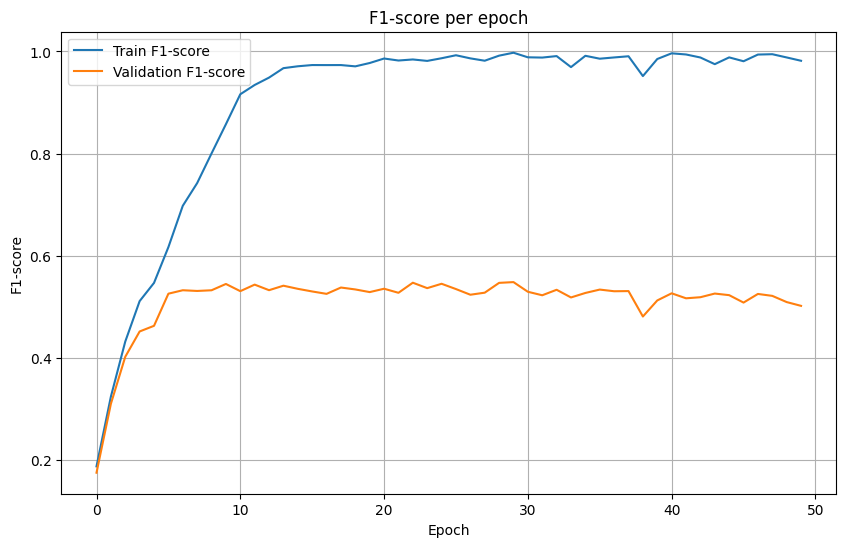

In [ ]:
#plot of f1 scores
plt.figure(figsize=(10, 6))
plt.plot(f1_callback.f1_train_scores, label='Train F1-score')
plt.plot(f1_callback.f1_val_scores, label='Validation F1-score')
plt.title('F1-score per epoch')
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.legend()
plt.grid(True)
plt.show()


Once again, we observe the training F1-score approaching 1, indicating overfitting due to the high capacity of the network and the limited size of our dataset.  
Nevertheless, the validation F1-score is higher compared to the previous networks.


**Testing**

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
################ TESTING ###############

#logits and predictions on test set
y_pred_logits = model.predict(x_test)
y_pred = np.argmax(y_pred_logits, axis=1)

# F1 and accuracy
y_test = y_test.flatten()
f1_macro = f1_score(y_test, y_pred, average='macro')
acc = accuracy_score(y_test, y_pred)

print("F1 Score:", f1_macro)
print("Accuracy:", acc)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
F1 Score: 0.514876857523478
Accuracy: 0.5115


Compared to the previous networks, we observe an increase of approximately 0.2 in both F1-score and accuracy, making VGG the most effective model so far—despite its high capacity and our small dataset.


# MY CNN

We designed a custom network that we believe is better suited to the size of our dataset. The architecture is as follows:

* Conv 3×3 with 32 filters followed by average pooling of size 2  
* Conv 3×3 with 64 filters followed by average pooling of size 2  
* Conv 3×3 with 128 filters followed by average pooling of size 2  
* Fully connected layer projecting to 512 neurons  
* Fully connected layer projecting to 256 neurons  
* Final projection to the number of classes

All convolutional layers use "same" zero padding to preserve the spatial dimensions of the input. Additionally, ReLU is used as the activation function throughout the network.


In [ ]:
#We will create our own cnn

import tensorflow as tf
from tensorflow.keras import layers, models

class MYCNN(tf.keras.Model):
    def __init__(self, num_classes=20, input_shape=(224, 224, 3)):
        super(MYCNN, self).__init__()

        # Ορίζουμε το Sequential μοντέλο με τα στρώματα
        self.model = models.Sequential()

        # 1st Conv Block: Conv2D -> AveragePooling2D
        self.model.add(layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=input_shape))
        self.model.add(layers.AveragePooling2D(pool_size=2))

        # 2nd Conv Block: Conv2D -> AveragePooling2D
        self.model.add(layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
        self.model.add(layers.AveragePooling2D(pool_size=2))

        # 3rd Conv Block: Conv2D -> AveragePooling2D
        self.model.add(layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
        self.model.add(layers.AveragePooling2D(pool_size=2))

        # Fully Connected Layers
        self.model.add(layers.Flatten())
        self.model.add(layers.Dense(512, activation='relu'))
        #self.model.add(layers.Dropout(0.5)) #Firstly without dropout to see the differnces
        self.model.add(layers.Dense(256, activation='relu'))
        #self.model.add(layers.Dropout(0.5)) #Firstly without dropout to see the differnces

        # Output Layer (logits)
        self.model.add(layers.Dense(num_classes))

    def call(self, inputs):
        return self.model(inputs)


**Resizing the images to 224×224 resulted in worse F1-scores, which is why we kept the model trained on 32×32 images. However, we present both versions of the model along with their results.**


## Images of size 32x32:

In [ ]:
model1 = MYCNN(num_classes=20)
f1_callback = F1ScoreCallback(x_train, y_train, x_val, y_val)


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# train
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[f1_callback]
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1130 - loss: 2.8486 — f1_train: 0.2141 — f1_val: 0.1972
133/133 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.1134 - loss: 2.8475 - val_accuracy: 0.2440 - val_loss: 2.4933
Epoch 2/50
132/133 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2668 - loss: 2.4147 — f1_train: 0.3390 — f1_val: 0.3219
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.2671 - loss: 2.4137 - val_accuracy: 0.3413 - val_loss: 2.1944
Epoch 3/50
129/133 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3573 - loss: 2.1293 — f1_train: 0.4109 — f1_val: 0.3897
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.3576 - loss: 2.1279 - val_accuracy: 0.4000 - val_loss: 2.0242
Epoch 4/50
131/133 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4167 - loss: 1.9435 — f1_train: 0.4535 — f1_val: 0.4090
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4169 - loss: 1.9428 - val_accuracy: 0.4213 - val_loss: 1.9026
Epoch 5/50
127/133 ━━━━━━━━━━━━━━━━━━━

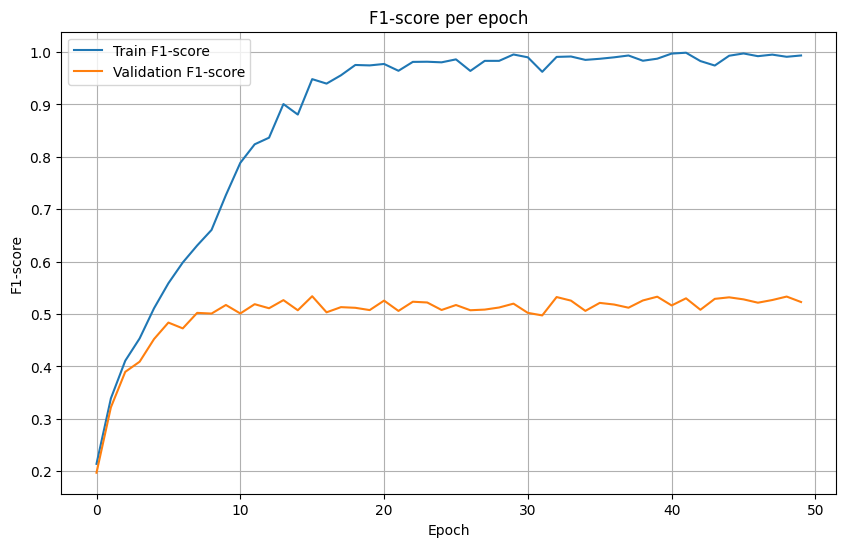

In [ ]:
#plot of f1 scores
plt.figure(figsize=(10, 6))
plt.plot(f1_callback.f1_train_scores, label='Train F1-score')
plt.plot(f1_callback.f1_val_scores, label='Validation F1-score')
plt.title('F1-score per epoch')
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import f1_score, accuracy_score
################ TESTING ###############

#logits and predictions on test set
y_pred_logits = model.predict(x_test)
y_pred = np.argmax(y_pred_logits, axis=1)

# F1 and accuracy
y_test = y_test.flatten()
f1_macro = f1_score(y_test, y_pred, average='macro')
acc = accuracy_score(y_test, y_pred)

print("F1 Score:", f1_macro)
print("Accuracy:", acc)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
F1 Score: 0.5276290447113904
Accuracy: 0.536


# Resized images to 224x224:

In [ ]:
#resizing images
x_train = tf.image.resize(x_train, [224, 224])
x_val = tf.image.resize(x_val, [224, 224])
x_test = tf.image.resize(x_test, [224, 224])

In [ ]:
model2 = MYCNN(num_classes=20)
f1_callback = F1ScoreCallback(x_train, y_train, x_val, y_val)


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# train
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[f1_callback]
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.1789 - loss: 2.7139 — f1_train: 0.3334 — f1_val: 0.3303
133/133 ━━━━━━━━━━━━━━━━━━━━ 43s 246ms/step - accuracy: 0.1794 - loss: 2.7123 - val_accuracy: 0.3580 - val_loss: 2.1998
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.3759 - loss: 2.0463 — f1_train: 0.4365 — f1_val: 0.3782
133/133 ━━━━━━━━━━━━━━━━━━━━ 19s 145ms/step - accuracy: 0.3760 - loss: 2.0462 - val_accuracy: 0.3920 - val_loss: 2.0560
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.4474 - loss: 1.8288 — f1_train: 0.5080 — f1_val: 0.4057
133/133 ━━━━━━━━━━━━━━━━━━━━ 21s 146ms/step - accuracy: 0.4474 - loss: 1.8285 - val_accuracy: 0.4207 - val_loss: 1.9375
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5262 - loss: 1.5416 — f1_train: 0.5663 — f1_val: 0.4223
133/133 ━━━━━━━━━━━━━━━━━━━━ 20s 141ms/step - accuracy: 0.5261 - loss: 1.5418 - val_accuracy: 0.4340 - val_loss: 1.9404
Epoch 5/50
133/133 ━━━━━━━━

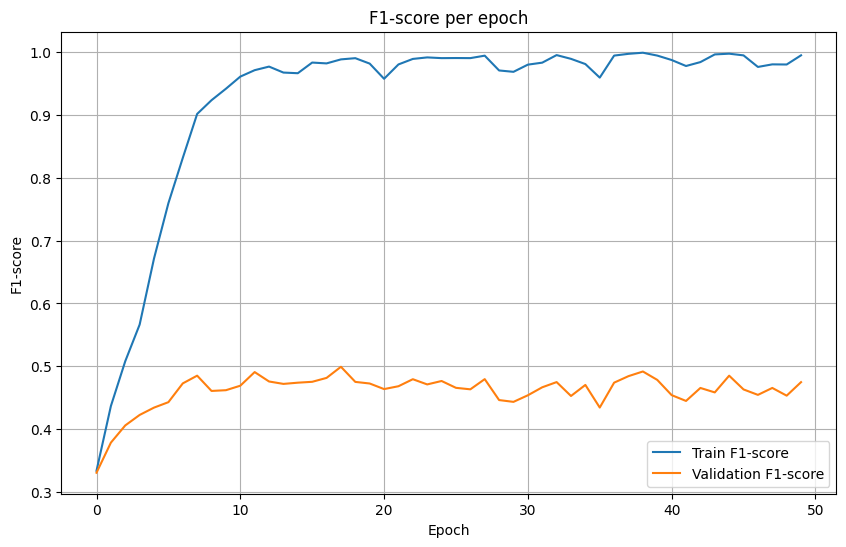

In [ ]:
#plot of f1 scores
plt.figure(figsize=(10, 6))
plt.plot(f1_callback.f1_train_scores, label='Train F1-score')
plt.plot(f1_callback.f1_val_scores, label='Validation F1-score')
plt.title('F1-score per epoch')
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import f1_score, accuracy_score
################ TESTING ###############

#logits and predictions on test set
y_pred_logits = model.predict(x_test)
y_pred = np.argmax(y_pred_logits, axis=1)

# F1 and accuracy
y_test = y_test.flatten()
f1_macro = f1_score(y_test, y_pred, average='macro')
acc = accuracy_score(y_test, y_pred)

print("F1 Score:", f1_macro)
print("Accuracy:", acc)


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step
F1 Score: 0.4717813393906646
Accuracy: 0.4725


We observed that using resized images led to worse results (0.47 vs. 0.53). Overall, the CNN trained on 32×32 images performed about 0.1 better than VGG-11. However, overfitting persists, as indicated by the training F1-score. In the following section, we will apply techniques to improve generalization.


## Question 2
---

### Step 1: Overfitting Control

For your custom model (**MyCNN**) only, experiment with various combinations of the following techniques to control overfitting and improve generalization:

- **Dropout**  
  [Dropout (TensorFlow guide)](https://www.tensorflow.org/tutorials/images/classification#dropout)

- **Data Augmentation**  
  [Data Augmentation (TensorFlow guide)](https://www.tensorflow.org/tutorials/images/classification#data_augmentation)  
  [ImageDataGenerator Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#class_imagedatagenerator)

---

### Step 2: Evaluation

Evaluate your results using the **F1-score** on both the **validation set** and the **test set**.

---


# **Data augmentation**
**We apply transformations to create more complex data to prevent overfitting.**

In [ ]:
#Data augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20, #random rotation 0-20 deegres
    width_shift_range=0.2, #random shift of the image 20% of its width
    height_shift_range=0.2, #" - "
    shear_range=0.2, #this, "rotates" the image creating effects
    zoom_range=0.2, #random zoom
    horizontal_flip=True,
    fill_mode='nearest', #fills the pixels that has no values (which occured from the transformations above) with the nearest values
    #brightness_range=[0.8, 1.2] #random brightness (0.2-1.8 times the original brightness)
)

# Create augmented data generator
train_generator = datagen.flow(x_train, y_train, batch_size=64)

**Lets see some examples of our augmented data:**

<Figure size 1200x900 with 0 Axes>

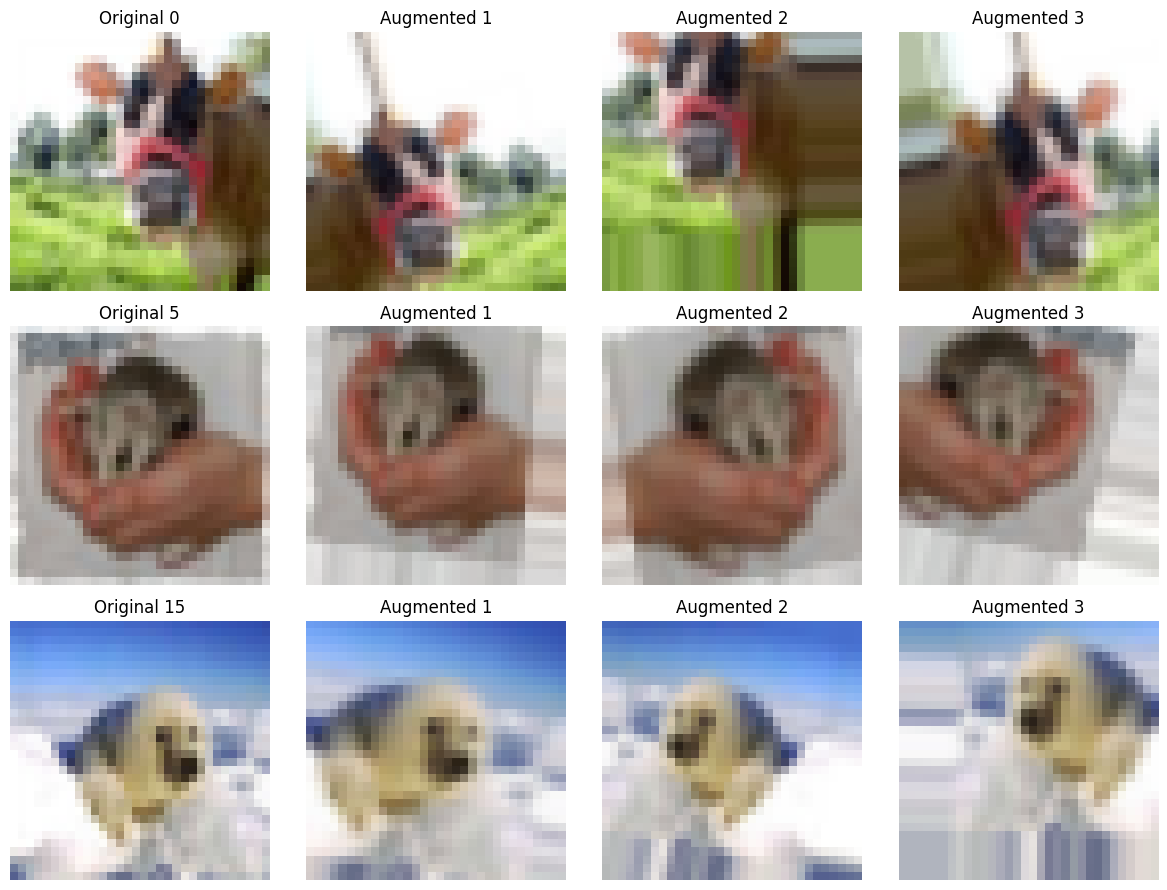

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# the images we plot
indices = [0, 5, 15]
originals = []
augmented1 = []
augmented2 = []
augmented3 = []

plt.figure(figsize=(12, 9))

for row, idx in enumerate(indices):

    original_img = x_train[idx]
    #the generator takes as input (batch_size, 32, 32, 3)
    sample_img = np.expand_dims(original_img, 0) # sample_img.shape = (1, 32, 32, 3)

    originals.append(original_img)

    #generator
    aug_iter = datagen.flow(sample_img, batch_size=1)
    augmented1.append(next(aug_iter)[0])
    augmented2.append(next(aug_iter)[0])
    augmented3.append(next(aug_iter)[0])




# plotting the images
plt.figure(figsize=(12, 9))

for i in range(3):
    plt.subplot(3, 4, i*4 + 1)
    plt.imshow(originals[i])
    plt.title(f"Original {indices[i]}")
    plt.axis('off')

    plt.subplot(3, 4, i*4 + 2)
    plt.imshow(augmented1[i])
    plt.title("Augmented 1")
    plt.axis('off')

    plt.subplot(3, 4, i*4 + 3)
    plt.imshow(augmented2[i])
    plt.title("Augmented 2")
    plt.axis('off')

    plt.subplot(3, 4, i*4 + 4)
    plt.imshow(augmented3[i])
    plt.title("Augmented 3")
    plt.axis('off')

plt.tight_layout()
plt.show()


# **Lets train the model with the augmented input, batch normalization and dropout.**

In [ ]:
################ WE ADD DROPOUT IN FC LAYERS AND BATCH NORM AFTER CONV #########################

class MYCNN(tf.keras.Model):
    def __init__(self, num_classes=20, input_shape=(32, 32, 3)):
        super(MYCNN, self).__init__()

        # Ορίζουμε το Sequential μοντέλο με τα στρώματα
        self.model = models.Sequential()

        # 1st Conv Block: Conv2D -> AveragePooling2D
        self.model.add(layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=input_shape))
        tf.keras.layers.BatchNormalization()
        self.model.add(layers.AveragePooling2D(pool_size=2))

        # 2nd Conv Block: Conv2D -> AveragePooling2D
        self.model.add(layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
        tf.keras.layers.BatchNormalization()
        self.model.add(layers.AveragePooling2D(pool_size=2))

        # 3rd Conv Block: Conv2D -> AveragePooling2D
        self.model.add(layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
        tf.keras.layers.BatchNormalization()
        self.model.add(layers.AveragePooling2D(pool_size=2))

        # Fully Connected Layers
        self.model.add(layers.Flatten())
        self.model.add(layers.Dense(512, activation='relu'))
        self.model.add(layers.Dropout(0.5)) #DROPOUT
        self.model.add(layers.Dense(256, activation='relu'))
        self.model.add(layers.Dropout(0.5)) #DROPOUT

        # Output Layer (logits)
        self.model.add(layers.Dense(num_classes))

    def call(self, inputs):
        return self.model(inputs)


In [ ]:
model = MYCNN(num_classes=20)
f1_callback = F1ScoreCallback(x_train, y_train, x_val, y_val)


# Συμπίεση του μοντέλου
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

#train
model.fit(
    train_generator, #instead of (x_train, y_train) we pass the generator
    epochs=50,
    validation_data=(x_val, y_val),
    callbacks=[f1_callback]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.1065 - loss: 2.8481 — f1_train: 0.1841 — f1_val: 0.1745
133/133 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - accuracy: 0.1068 - loss: 2.8473 - val_accuracy: 0.2353 - val_loss: 2.5468
Epoch 2/50
132/133 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2251 - loss: 2.5503 — f1_train: 0.2853 — f1_val: 0.2737
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.2254 - loss: 2.5494 - val_accuracy: 0.3067 - val_loss: 2.2587
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2766 - loss: 2.3735 — f1_train: 0.3391 — f1_val: 0.3310
133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.2767 - loss: 2.3733 - val_accuracy: 0.3587 - val_loss: 2.1526
Epoch 4/50
132/133 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3233 - loss: 2.2250 — f1_train: 0.3527 — f1_val: 0.3494
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.3232 - loss: 2.2249 - val_accuracy: 0.3773 - val_loss: 2.0227
Epoch 5/50
132/133 ━━━━━━━━━━━━━━━━━━━━ 0s 34m

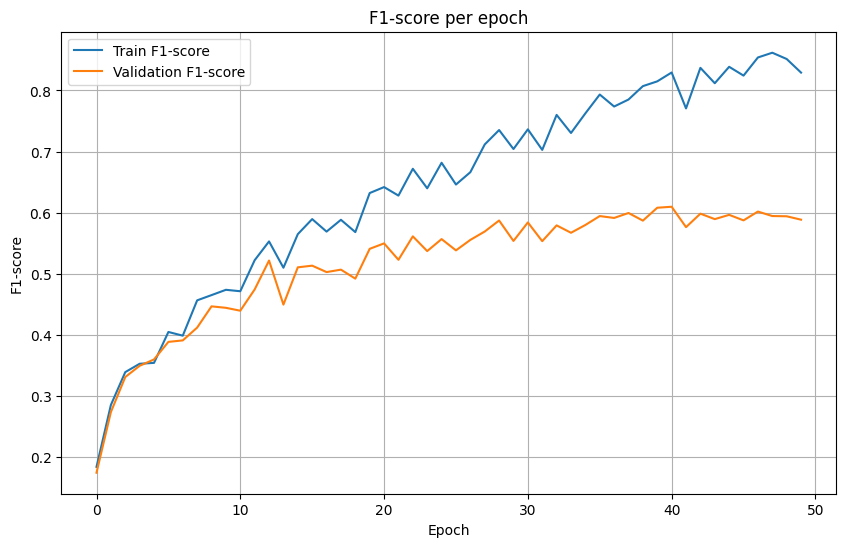

In [ ]:
#plot of f1 scores
plt.figure(figsize=(10, 6))
plt.plot(f1_callback.f1_train_scores, label='Train F1-score')
plt.plot(f1_callback.f1_val_scores, label='Validation F1-score')
plt.title('F1-score per epoch')
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.legend()
plt.grid(True)
plt.show()


It is clear that overfitting has been reduced, as the training F1-score dropped to 0.82.  
As a result, our model generalizes better, achieving an F1-score of 0.58 on the validation set — approximately 0.06 higher than the basic model without any regularization or augmentation techniques.


**Testing**

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
################ TESTING ###############

#logits and predictions on test set
y_pred_logits = model.predict(x_test)
y_pred = np.argmax(y_pred_logits, axis=1)

# F1 and accuracy
y_test = y_test.flatten()
f1_macro = f1_score(y_test, y_pred, average='macro')
acc = accuracy_score(y_test, y_pred)

print("F1 Score:", f1_macro)
print("Accuracy:", acc)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
F1 Score: 0.5847905276683059
Accuracy: 0.587


Indeed, we also observe an increase of approximately 0.06 in both F1-score and accuracy on the test set.


## Question 3
---

### Step 1: Transfer Learning

Apply **transfer learning** to your custom model (**MyCNN**), which you previously evaluated as the most effective in addressing overfitting based on the F1-score.

For transfer learning, use the following pre-trained models:

- [VGG19](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg19)  
- [EfficientNetB0](https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet/EfficientNetB0)

a. **Freeze** the convolutional base and train only the classification head (`trainable = False`).  

b. Train only a portion of the layers near the output of the network. In this case, the `trainable` flag must be set individually for each layer.

---

### Step 2: Evaluation

Evaluate your results based on the **F1-score** for both the **validation set** and the **test set**.

---


# Transfer Learning and Fine Tuning with VGG19

a) First, we apply transfer learning using the **VGG19** model.  
Essentially, we freeze the weights of the model's convolutional base so that they are not retrained, and we only train the custom classification head that we add on top.


In [ ]:
x_train = (x_train*255).astype('uint8')
x_val = (x_val*255).astype('uint8')
x_test = (x_test*255).astype('uint8')

x_train_res = tf.image.resize(x_train, (224,224)).numpy()
x_val_res = tf.image.resize(x_val, (224,224)).numpy()
x_test_res = tf.image.resize(x_test, (224,224)).numpy()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input


"""
Each model, has each own preprocess_input which
transfer the input to the corresponding input in which
it has been trained.
"""

x_train_res = preprocess_input(x_train_res)
x_val_res = preprocess_input(x_val_res)
x_test_res = preprocess_input(x_test_res)


#Load the pretrained model VGG19
base_model = VGG19(weights='imagenet', include_top=False,input_shape=(224,224,3))
#We set trainable false so that we dont train the conv layers again
base_model.trainable = False

#We add our classification head
model = models.Sequential([
    layers.InputLayer(input_shape=(224, 224, 3)),
    base_model,  # VGG19
    layers.Flatten(),  # flattening and Pooling
    layers.Dense(1024, activation='relu'), #FC layer
    layers.Dropout(0.5),  # Dropout
    layers.Dense(20)  # 20 classes
])



80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
######################### Training #######################
f1_callback = F1ScoreCallback(x_train_res, y_train, x_val_res, y_val)



model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train (only the classification head is being trained)
history = model.fit(
    x_train_res, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(x_val_res, y_val),
    callbacks=[f1_callback]
)


Epoch 1/5
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.5170 - loss: 13.7802 — f1_train: 0.8750 — f1_val: 0.7601
133/133 ━━━━━━━━━━━━━━━━━━━━ 135s 859ms/step - accuracy: 0.5178 - loss: 13.7194 - val_accuracy: 0.7660 - val_loss: 0.8482
Epoch 2/5
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.7789 - loss: 0.8602 — f1_train: 0.9346 — f1_val: 0.7848
133/133 ━━━━━━━━━━━━━━━━━━━━ 65s 491ms/step - accuracy: 0.7790 - loss: 0.8600 - val_accuracy: 0.7907 - val_loss: 0.8468
Epoch 3/5
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.8370 - loss: 0.6163 — f1_train: 0.9649 — f1_val: 0.8194
133/133 ━━━━━━━━━━━━━━━━━━━━ 66s 495ms/step - accuracy: 0.8370 - loss: 0.6164 - val_accuracy: 0.8207 - val_loss: 0.7676
Epoch 4/5
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.8696 - loss: 0.4952 — f1_train: 0.9642 — f1_val: 0.7902
133/133 ━━━━━━━━━━━━━━━━━━━━ 65s 493ms/step - accuracy: 0.8695 - loss: 0.4953 - val_accuracy: 0.7953 - val_loss: 0.9437
Epoch 5/5
133/133 ━━━━━━━

Evaluation of the model on the validation set and the test set.


In [ ]:
from sklearn.metrics import f1_score, accuracy_score
################ TESTING ###############

#logits and predictions on test set
y_pred_logits = model.predict(x_test_res)
y_pred = np.argmax(y_pred_logits, axis=1)

# F1 and accuracy
y_test = y_test.flatten()
f1_macro = f1_score(y_test, y_pred, average='macro')
acc = accuracy_score(y_test, y_pred)

print("Test set:")
print("F1 Score:", f1_macro)
print("Accuracy:", acc)



#logits and predictions on val set
y_pred_logits = model.predict(x_val_res)
y_pred = np.argmax(y_pred_logits, axis=1)

# F1 and accuracy
y_val = y_val.flatten()
f1_macro = f1_score(y_val, y_pred, average='macro')
acc = accuracy_score(y_val, y_pred)

print("\nValidation set:")
print("F1 Score:", f1_macro)
print("Accuracy:", acc)



63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 181ms/step
Test set:
F1 Score: 0.8050750339580934
Accuracy: 0.802
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step

Validation set:
F1 Score: 0.8069470710732599
Accuracy: 0.8053333333333333


We observe that by applying transfer learning and training only the classification head, we achieve significantly high performance.  
This is expected, as the model has been pre-trained on much larger datasets.


b) Here, we perform fine-tuning by also training a portion of the final layers of the network.  
We further reduce the learning rate to avoid significantly altering the pre-trained weights of the base model.


In [ ]:
#Unlock the layers we locked before
base_model.trainable = True

#we will lock the first 5 layers
fine_tune_at = 5
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False  #lock the first 15 layers


#We add our classification head
#The input shape MUST be specified
model = models.Sequential([
    layers.InputLayer(input_shape=(224, 224, 3)),
    base_model,  # VGG19
    layers.Flatten(),  # Pooling
    layers.Dense(1024, activation='relu'), #FC layer
    layers.Dropout(0.5),  # Dropout
    layers.Dense(20)  # 20 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
######################### Training #######################

f1_callback = F1ScoreCallback(x_train_res, y_train, x_val_res, y_val)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  #smaller learning rate
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# train
history_finetune = model.fit(
    x_train_res, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(x_val_res, y_val),
    callbacks=[f1_callback]
)


Epoch 1/5
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 585ms/step - accuracy: 0.0597 - loss: 3.7384 — f1_train: 0.0295 — f1_val: 0.0294
133/133 ━━━━━━━━━━━━━━━━━━━━ 154s 924ms/step - accuracy: 0.0597 - loss: 3.7339 - val_accuracy: 0.0773 - val_loss: 2.9652
Epoch 2/5
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.1023 - loss: 2.8670 — f1_train: 0.2074 — f1_val: 0.2060
133/133 ━━━━━━━━━━━━━━━━━━━━ 95s 718ms/step - accuracy: 0.1026 - loss: 2.8663 - val_accuracy: 0.2487 - val_loss: 2.5054
Epoch 3/5
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - accuracy: 0.2397 - loss: 2.4647 — f1_train: 0.3072 — f1_val: 0.2890
133/133 ━━━━━━━━━━━━━━━━━━━━ 96s 722ms/step - accuracy: 0.2398 - loss: 2.4641 - val_accuracy: 0.3240 - val_loss: 2.2185
Epoch 4/5
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - accuracy: 0.3636 - loss: 2.0483 — f1_train: 0.5011 — f1_val: 0.4695
133/133 ━━━━━━━━━━━━━━━━━━━━ 96s 721ms/step - accuracy: 0.3638 - loss: 2.0477 - val_accuracy: 0.4873 - val_loss: 1.7027
Epoch 5/5
133/133 ━━━━━━━━━

Model evaluation

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
################ TESTING ###############

#logits and predictions on test set
y_pred_logits = model.predict(x_test_res)
y_pred = np.argmax(y_pred_logits, axis=1)

# F1 and accuracy
y_test = y_test.flatten()
f1_macro = f1_score(y_test, y_pred, average='macro')
acc = accuracy_score(y_test, y_pred)

print("Test set:")
print("F1 Score:", f1_macro)
print("Accuracy:", acc)



#logits and predictions on val set
y_pred_logits = model.predict(x_val_res)
y_pred = np.argmax(y_pred_logits, axis=1)

# F1 and accuracy
y_val = y_val.flatten()
f1_macro = f1_score(y_val, y_pred, average='macro')
acc = accuracy_score(y_val, y_pred)

print("\nValidation set:")
print("F1 Score:", f1_macro)
print("Accuracy:", acc)



63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step
Test set:
F1 Score: 0.5607890000763255
Accuracy: 0.5685
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step

Validation set:
F1 Score: 0.5795175368953391
Accuracy: 0.5933333333333334


We observe that the results are worse than plain transfer learning, which is expected since we are also training the last layers of the network, potentially "damaging" its general knowledge in an attempt to specialize it on our dataset.  
However, with more training epochs, we estimate that the model could reach the performance of the initial transfer learning approach, as its performance continues to improve with each epoch.  
It is likely that we should have fine-tuned fewer layers.

We also observe longer training times, as we are now updating convolutional layer parameters in addition to the classification head.


# Transfer Learning και Fine Tuning with EfficientNetB0

Same exact process, just using a different model.

a) Transfer Learning


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input



"""
Each model, has each own preprocess_input which
transfer the input to the corresponding input in which
it has been trained.
"""

x_train_res = preprocess_input(x_train_res)
x_val_res = preprocess_input(x_val_res)
x_test_res = preprocess_input(x_test_res)


#Load the pretrained model EfficientNetB0
base_model = EfficientNetB0(weights='imagenet', include_top=False,input_shape=(224,224,3))
#We set trainable false so that we dont train the conv layers again
base_model.trainable = False

#We add our classification head
model = models.Sequential([
    layers.InputLayer(input_shape=(224, 224, 3)),
    base_model,  # VGG19
    layers.Flatten(),  # flattening and Pooling
    layers.Dense(1024, activation='relu'), #FC layer
    layers.Dropout(0.5),  # Dropout
    layers.Dense(20)  # 20 classes
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
######################### Training #######################
f1_callback = F1ScoreCallback(x_train_res, y_train, x_val_res, y_val)



model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train (only the classification head is being trained)
history = model.fit(
    x_train_res, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(x_val_res, y_val),
    callbacks=[f1_callback]
)


Epoch 1/5
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.5382 - loss: 12.7597 — f1_train: 0.8678 — f1_val: 0.7602
133/133 ━━━━━━━━━━━━━━━━━━━━ 73s 535ms/step - accuracy: 0.5387 - loss: 12.7038 - val_accuracy: 0.7620 - val_loss: 0.9627
Epoch 2/5
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.7775 - loss: 0.9052 — f1_train: 0.9317 — f1_val: 0.7840
133/133 ━━━━━━━━━━━━━━━━━━━━ 65s 489ms/step - accuracy: 0.7775 - loss: 0.9050 - val_accuracy: 0.7840 - val_loss: 0.9524
Epoch 3/5
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.8233 - loss: 0.6754 — f1_train: 0.9544 — f1_val: 0.8115
133/133 ━━━━━━━━━━━━━━━━━━━━ 66s 496ms/step - accuracy: 0.8233 - loss: 0.6756 - val_accuracy: 0.8113 - val_loss: 0.9723
Epoch 4/5
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.8523 - loss: 0.6175 — f1_train: 0.9659 — f1_val: 0.8000
133/133 ━━━━━━━━━━━━━━━━━━━━ 65s 492ms/step - accuracy: 0.8523 - loss: 0.6176 - val_accuracy: 0.7987 - val_loss: 0.9542
Epoch 5/5
133/133 ━━━━━━━━

Model evaluation

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
################ TESTING ###############

#logits and predictions on test set
y_pred_logits = model.predict(x_test_res)
y_pred = np.argmax(y_pred_logits, axis=1)

# F1 and accuracy
y_test = y_test.flatten()
f1_macro = f1_score(y_test, y_pred, average='macro')
acc = accuracy_score(y_test, y_pred)

print("Test set:")
print("F1 Score:", f1_macro)
print("Accuracy:", acc)



#logits and predictions on val set
y_pred_logits = model.predict(x_val_res)
y_pred = np.argmax(y_pred_logits, axis=1)

# F1 and accuracy
y_val = y_val.flatten()
f1_macro = f1_score(y_val, y_pred, average='macro')
acc = accuracy_score(y_val, y_pred)

print("\nValidation set:")
print("F1 Score:", f1_macro)
print("Accuracy:", acc)



63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step
Test set:
F1 Score: 0.8011543013327003
Accuracy: 0.803
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step

Validation set:
F1 Score: 0.8132479598580824
Accuracy: 0.8173333333333334


We observe that by applying transfer learning and training only the classification head, we achieve very high performance — a result that is expected since the model was pretrained on much larger datasets.


** b) Fine tuning**

In [ ]:
#Unlock the layers we locked before
base_model.trainable = True

#we will lock the first 5 layers
fine_tune_at = 5
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False  #lock the first 15 layers


#We add our classification head
model = models.Sequential([
    layers.InputLayer(input_shape=(224, 224, 3)),
    base_model,  # VGG19
    layers.Flatten(),  # Pooling
    layers.Dense(1024, activation='relu'), #FC layer
    layers.Dropout(0.5),  # Dropout
    layers.Dense(20)  # 20 classes
])




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
######################### Training #######################

f1_callback = F1ScoreCallback(x_train_res, y_train, x_val_res, y_val)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  #smaller learning rate
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# train
history_finetune = model.fit(
    x_train_res, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(x_val_res, y_val),
    callbacks=[f1_callback]
)


Epoch 1/5
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.0682 - loss: 3.6690 — f1_train: 0.1663 — f1_val: 0.1636
133/133 ━━━━━━━━━━━━━━━━━━━━ 109s 770ms/step - accuracy: 0.0684 - loss: 3.6643 - val_accuracy: 0.2033 - val_loss: 2.6295
Epoch 2/5
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step - accuracy: 0.2402 - loss: 2.4849 — f1_train: 0.3951 — f1_val: 0.3717
133/133 ━━━━━━━━━━━━━━━━━━━━ 96s 722ms/step - accuracy: 0.2406 - loss: 2.4837 - val_accuracy: 0.4020 - val_loss: 1.9656
Epoch 3/5
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - accuracy: 0.4298 - loss: 1.8554 — f1_train: 0.6296 — f1_val: 0.5790
133/133 ━━━━━━━━━━━━━━━━━━━━ 96s 721ms/step - accuracy: 0.4300 - loss: 1.8546 - val_accuracy: 0.5793 - val_loss: 1.3832
Epoch 4/5
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - accuracy: 0.5778 - loss: 1.3499 — f1_train: 0.6373 — f1_val: 0.5659
133/133 ━━━━━━━━━━━━━━━━━━━━ 95s 719ms/step - accuracy: 0.5778 - loss: 1.3497 - val_accuracy: 0.5813 - val_loss: 1.3554
Epoch 5/5
133/133 ━━━━━━━━━

Evaluation.

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
################ TESTING ###############

#logits and predictions on test set
y_pred_logits = model.predict(x_test_res)
y_pred = np.argmax(y_pred_logits, axis=1)

# F1 and accuracy
y_test = y_test.flatten()
f1_macro = f1_score(y_test, y_pred, average='macro')
acc = accuracy_score(y_test, y_pred)

print("Test set:")
print("F1 Score:", f1_macro)
print("Accuracy:", acc)



#logits and predictions on val set
y_pred_logits = model.predict(x_val_res)
y_pred = np.argmax(y_pred_logits, axis=1)

# F1 and accuracy
y_val = y_val.flatten()
f1_macro = f1_score(y_val, y_pred, average='macro')
acc = accuracy_score(y_val, y_pred)

print("\nValidation set:")
print("F1 Score:", f1_macro)
print("Accuracy:", acc)



63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step
Test set:
F1 Score: 0.7016364628160789
Accuracy: 0.702
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step

Validation set:
F1 Score: 0.6811138339326451
Accuracy: 0.6813333333333333


We observe that the performance is worse compared to plain transfer learning, which is expected since we are now training some of the final layers of the network — slightly disrupting its generalized knowledge in an attempt to specialize it to our dataset. However, we estimate that with more training epochs, the performance could approach that of plain transfer learning, as the model shows significant improvement per epoch. It's also possible that we should have fine-tuned fewer layers.

We also observe increased training time, as we are now updating parameters of convolutional layers in addition to the classifi
